# Spark Tutorial 2 - Working with Airline Data

This notebook uses the original Flights and Airports dataset from de US Department of Transport.
We do several operations reletad with:
* Loading, formating and parsing data

And the use of the following operators:
* lambda, map, reduce, filter 
* aggregate
* reduceByKey
* combineByKey
* lookUp
* dictionary
* broadcast

## Part 1
### Loading data

In [1]:
# Lets's verify Spark Context is loaded
sc

In [2]:
# Version
sc.version

u'2.0.0'

In [3]:
# Set up the file paths for your data 
# If it's on the local system append file:// to the beginning of the path 
# If it's on hdfs append hdfs://

#airlinesPath="hdfs:///user/swethakolalapudi/flightDelaysData/airlines.csv"
#airportsPath="hdfs:///user/swethakolalapudi/flightDelaysData/airports.csv"
#flightsPath="hdfs:///user/swethakolalapudi/flightDelaysData/flights.csv"

airlinesPath = "file:///Users/Andres/OneDrive/SparkTraining/Spark_Red/2_FlightDelays/FlightsData/airlines.csv"
airportsPath = "file:///Users/Andres/OneDrive/SparkTraining/Spark_Red/2_FlightDelays/FlightsData/airports.csv"
flightsPath  = "file:///Users/Andres/OneDrive/SparkTraining/Spark_Red/2_FlightDelays/FlightsData/flights.csv"

In [4]:
# With use_unicode=False, the strings will be kept as str (encoding as utf-8), 
# which is faster and smaller than unicode.
# We get better presentation of the data eliminating the 'u' character

airlines=sc.textFile(airlinesPath, use_unicode=False)

In [5]:
# Airlines is an RDD 
print airlines
print type(airlines)

file:///Users/Andres/OneDrive/SparkTraining/Spark_Red/2_FlightDelays/FlightsData/airlines.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:-2
<class 'pyspark.rdd.RDD'>


In [6]:
# Using the collect operation, you can view the full dataset 
airlines.collect()

['Code,Description',
 '"19031","Mackey International Inc.: MAC"',
 '"19032","Munz Northern Airlines Inc.: XY"',
 '"19033","Cochise Airlines Inc.: COC"',
 '"19034","Golden Gate Airlines Inc.: GSA"',
 '"19035","Aeromech Inc.: RZZ"',
 '"19036","Golden West Airlines Co.: GLW"',
 '"19037","Puerto Rico Intl Airlines: PRN"',
 '"19038","Air America Inc.: STZ"',
 '"19039","Swift Aire Lines Inc.: SWT"',
 '"19040","American Central Airlines: TSF"',
 '"19041","Valdez Airlines: VEZ"',
 '"19042","Southeast Alaska Airlines: WEB"',
 '"19043","Altair Airlines Inc.: AAR"',
 '"19044","Chitina Air Service: CHI"',
 '"19045","Marco Island Airways Inc.: MRC"',
 '"19046","Caribbean Air Services Inc.: OHZ"',
 '"19047","Sundance Airlines: PRO"',
 '"19048","Seair Alaska Airlines Inc.: SAI"',
 '"19049","Southeast Airlines Inc.: SLZ"',
 '"19050","Alaska Aeronautical Indust.: AAZ"',
 '"19051","Imperial Airlines Inc.: IMP"',
 '"19052","Trans Western Airlines Utah: TWA"',
 '"19053","Wright Airlines Inc.: WRT"',
 '"19

In [7]:
airlines.first()

'Code,Description'

In [8]:
# Get the first 10 lines 
airlines.take(10)

['Code,Description',
 '"19031","Mackey International Inc.: MAC"',
 '"19032","Munz Northern Airlines Inc.: XY"',
 '"19033","Cochise Airlines Inc.: COC"',
 '"19034","Golden Gate Airlines Inc.: GSA"',
 '"19035","Aeromech Inc.: RZZ"',
 '"19036","Golden West Airlines Co.: GLW"',
 '"19037","Puerto Rico Intl Airlines: PRN"',
 '"19038","Air America Inc.: STZ"',
 '"19039","Swift Aire Lines Inc.: SWT"']

In [9]:
# Count 
%time airlines.count()

CPU times: user 3.74 ms, sys: 2.11 ms, total: 5.85 ms
Wall time: 45 ms


1580

In [10]:
# Here is how to filter the header out 

airlinesWoHeader = airlines.filter(lambda x:"Description" not in x)

In [11]:
print airlinesWoHeader

PythonRDD[5] at RDD at PythonRDD.scala:48


In [12]:
# Notice how when we go to print it, it prints out that it is an RDD and that the type 
# is a PipelinedRDD not a list of values as we might expect. 
# That's because we haven't performed an action yet, we've only performed a transformation.

type(airlinesWoHeader)

pyspark.rdd.PipelinedRDD

In [13]:
# How many partitions will the RDD be split into?
airlinesWoHeader.getNumPartitions()

2

In [14]:
type(airlinesWoHeader)

pyspark.rdd.PipelinedRDD

In [15]:
airlinesWoHeader.take(10)

['"19031","Mackey International Inc.: MAC"',
 '"19032","Munz Northern Airlines Inc.: XY"',
 '"19033","Cochise Airlines Inc.: COC"',
 '"19034","Golden Gate Airlines Inc.: GSA"',
 '"19035","Aeromech Inc.: RZZ"',
 '"19036","Golden West Airlines Co.: GLW"',
 '"19037","Puerto Rico Intl Airlines: PRN"',
 '"19038","Air America Inc.: STZ"',
 '"19039","Swift Aire Lines Inc.: SWT"',
 '"19040","American Central Airlines: TSF"']

In [16]:
# We split the RDD using commas and store it in a new RDD
%time airlinesParsed = airlinesWoHeader.map(lambda x:x.split(",")).take(10)

CPU times: user 5.52 ms, sys: 2.28 ms, total: 7.8 ms
Wall time: 32.4 ms


In [17]:
%time airlinesParsed

CPU times: user 2 µs, sys: 2 µs, total: 4 µs
Wall time: 5.96 µs


[['"19031"', '"Mackey International Inc.: MAC"'],
 ['"19032"', '"Munz Northern Airlines Inc.: XY"'],
 ['"19033"', '"Cochise Airlines Inc.: COC"'],
 ['"19034"', '"Golden Gate Airlines Inc.: GSA"'],
 ['"19035"', '"Aeromech Inc.: RZZ"'],
 ['"19036"', '"Golden West Airlines Co.: GLW"'],
 ['"19037"', '"Puerto Rico Intl Airlines: PRN"'],
 ['"19038"', '"Air America Inc.: STZ"'],
 ['"19039"', '"Swift Aire Lines Inc.: SWT"'],
 ['"19040"', '"American Central Airlines: TSF"']]

In [18]:
airlines.map(len).take(10)

[16, 40, 41, 36, 40, 28, 39, 40, 31, 36]

In [19]:
def notHeader(row):
    return "Description" not in row
airlines.filter(notHeader).take(10)

['"19031","Mackey International Inc.: MAC"',
 '"19032","Munz Northern Airlines Inc.: XY"',
 '"19033","Cochise Airlines Inc.: COC"',
 '"19034","Golden Gate Airlines Inc.: GSA"',
 '"19035","Aeromech Inc.: RZZ"',
 '"19036","Golden West Airlines Co.: GLW"',
 '"19037","Puerto Rico Intl Airlines: PRN"',
 '"19038","Air America Inc.: STZ"',
 '"19039","Swift Aire Lines Inc.: SWT"',
 '"19040","American Central Airlines: TSF"']

In [20]:
# Chain transformations together 
%time airlines.filter(notHeader) \
    .map(lambda x: x.split(',')) \
    .take(10)

CPU times: user 3.53 ms, sys: 1.78 ms, total: 5.31 ms
Wall time: 28.3 ms


[['"19031"', '"Mackey International Inc.: MAC"'],
 ['"19032"', '"Munz Northern Airlines Inc.: XY"'],
 ['"19033"', '"Cochise Airlines Inc.: COC"'],
 ['"19034"', '"Golden Gate Airlines Inc.: GSA"'],
 ['"19035"', '"Aeromech Inc.: RZZ"'],
 ['"19036"', '"Golden West Airlines Co.: GLW"'],
 ['"19037"', '"Puerto Rico Intl Airlines: PRN"'],
 ['"19038"', '"Air America Inc.: STZ"'],
 ['"19039"', '"Swift Aire Lines Inc.: SWT"'],
 ['"19040"', '"American Central Airlines: TSF"']]

In [21]:
# Use Python libraries 
import csv 
from StringIO import StringIO

def split(line):
    reader = csv.reader(StringIO(line))
    return reader.next()

airlines.filter(notHeader).map(split).take(10)

[['19031', 'Mackey International Inc.: MAC'],
 ['19032', 'Munz Northern Airlines Inc.: XY'],
 ['19033', 'Cochise Airlines Inc.: COC'],
 ['19034', 'Golden Gate Airlines Inc.: GSA'],
 ['19035', 'Aeromech Inc.: RZZ'],
 ['19036', 'Golden West Airlines Co.: GLW'],
 ['19037', 'Puerto Rico Intl Airlines: PRN'],
 ['19038', 'Air America Inc.: STZ'],
 ['19039', 'Swift Aire Lines Inc.: SWT'],
 ['19040', 'American Central Airlines: TSF']]

## Part 2 
### Calculating the average delay

In [22]:
# Loading the flights RDD
flights = sc.textFile(flightsPath, use_unicode=False)

In [23]:
flights.count()

476881

In [24]:
flights.take(10)

['2014-04-01,19805,1,JFK,LAX,0854,-6.00,1217,2.00,355.00,2475.00',
 '2014-04-01,19805,2,LAX,JFK,0944,14.00,1736,-29.00,269.00,2475.00',
 '2014-04-01,19805,3,JFK,LAX,1224,-6.00,1614,39.00,371.00,2475.00',
 '2014-04-01,19805,4,LAX,JFK,1240,25.00,2028,-27.00,264.00,2475.00',
 '2014-04-01,19805,5,DFW,HNL,1300,-5.00,1650,15.00,510.00,3784.00',
 '2014-04-01,19805,6,OGG,DFW,1901,126.00,0640,95.00,385.00,3711.00',
 '2014-04-01,19805,7,DFW,OGG,1410,125.00,1743,138.00,497.00,3711.00',
 '2014-04-01,19805,8,HNL,DFW,1659,4.00,0458,-22.00,398.00,3784.00',
 '2014-04-01,19805,9,JFK,LAX,0648,-7.00,1029,19.00,365.00,2475.00',
 '2014-04-01,19805,10,LAX,JFK,2156,21.00,0556,1.00,265.00,2475.00']

In [25]:
# Let' write a function to parse this row 

from datetime import datetime
from collections import namedtuple

fields   = ('date', 'airline', 'flightnum', 'origin', 'dest', 'dep',
            'dep_delay', 'arv', 'arv_delay', 'airtime', 'distance')

Flight   = namedtuple('Flight', fields, verbose=True)

DATE_FMT = '%Y-%m-%d'

TIME_FMT = '%H%M'


def parse(row):
    row[0]  = datetime.strptime(row[0], DATE_FMT).date()
    row[5]  = datetime.strptime(row[5], TIME_FMT).time()
    row[6]  = float(row[6])
    row[7]  = datetime.strptime(row[7], TIME_FMT).time()
    row[8]  = float(row[8])
    row[9]  = float(row[9])
    row[10] = float(row[10])
    return Flight(*row[:11])

class Flight(tuple):
    'Flight(date, airline, flightnum, origin, dest, dep, dep_delay, arv, arv_delay, airtime, distance)'

    __slots__ = ()

    _fields = ('date', 'airline', 'flightnum', 'origin', 'dest', 'dep', 'dep_delay', 'arv', 'arv_delay', 'airtime', 'distance')

    def __new__(_cls, date, airline, flightnum, origin, dest, dep, dep_delay, arv, arv_delay, airtime, distance):
        'Create new instance of Flight(date, airline, flightnum, origin, dest, dep, dep_delay, arv, arv_delay, airtime, distance)'
        return _tuple.__new__(_cls, (date, airline, flightnum, origin, dest, dep, dep_delay, arv, arv_delay, airtime, distance))

    @classmethod
    def _make(cls, iterable, new=tuple.__new__, len=len):
        'Make a new Flight object from a sequence or iterable'
        result = new(cls, iterable)
        if len(result) != 11:
            raise TypeError('Expected 11 arguments, got %d' % len(result))
        return result

    def __repr__(self):
        'Return a nicely

In [26]:
# We split the register with a lambda function and the apply a map function using the parse function over
# all of the registers
flightsParsed = flights.map(lambda x: x.split(',')).map(parse)

In [27]:
# We get a Flight object with all the attributes defined in the parse function
%time flightsParsed.first()

CPU times: user 4.16 ms, sys: 2.77 ms, total: 6.93 ms
Wall time: 30 ms


Flight(date=datetime.date(2014, 4, 1), airline='19805', flightnum='1', origin='JFK', dest='LAX', dep=datetime.time(8, 54), dep_delay=-6.0, arv=datetime.time(12, 17), arv_delay=2.0, airtime=355.0, distance=2475.0)

In [28]:
# Let's find the average distance travelled by a flight total distance accumulated
# We use a reduce function to calculate the total distance accumulated
%time totalDistance = flightsParsed.map(lambda x:x.distance).reduce(lambda x,y:x+y)

CPU times: user 4.94 ms, sys: 2.51 ms, total: 7.45 ms
Wall time: 7.75 s


In [29]:
%time avgDistance = totalDistance/flightsParsed.count()

CPU times: user 4.94 ms, sys: 2.85 ms, total: 7.79 ms
Wall time: 7.49 s


In [30]:
avgDistance

794.8585013871385

In [31]:
# Find the % of flights with delays 
%time flightsParsed.filter(lambda x:x.dep_delay>0).count()/float(flightsParsed.count())

CPU times: user 10.7 ms, sys: 3.41 ms, total: 14.1 ms
Wall time: 15.7 s


0.3753871510922012

In [32]:
flightsParsed.persist()

PythonRDD[21] at RDD at PythonRDD.scala:48

In [33]:
# Notice the difference in execution time between this code and the line [31]. The main difference lies in this 
# case the flightsParsed RDD is allocated in memory materialized.
%time flightsParsed.filter(lambda x:x.dep_delay>0).count()/float(flightsParsed.count())

CPU times: user 7.32 ms, sys: 3.34 ms, total: 10.7 ms
Wall time: 11.3 s


0.3753871510922012

In [34]:
# The same as before but using 'aggregate'
# sumCount is a tuple with both the sum of total delays and the count
# aggregate
# the firts lambda function is computed in each node in the cluster. acc, value is a tuple
# acc[0]+value is the accumulate (sum) portion
# acc[1]+1 is the count
# acc1[0]+acc2[0] sum the firts element [0] of every node, so it is adding the acumulating part
# acc1[1]+acc2[1] sum the second element [1] of the tuple of every node, so it is adding the count
# Finaly, (0,0) is the initialization  of the tuple of the aggregation funcion

# the second lambda funtion is used to combine the results of every node
sumCount=flightsParsed.map(lambda x:x.dep_delay).aggregate((0,0),
                                                          (lambda acc,value: (acc[0]+value, acc[1]+1)),
                                                          (lambda acc1,acc2:(acc1[0]+acc2[0],acc1[1]+acc2[1])))

In [35]:
print "The average delay is "+str(sumCount[0]/float(sumCount[1]))

The average delay is 8.31387704689


### Frequency delay distribution

In [36]:
# We generates a dictionary with the distribution
fightsParsedDict = flightsParsed.map(lambda x:int(x.dep_delay/60)).countByValue()


In [37]:
print fightsParsedDict

defaultdict(<type 'int'>, {0: 452963, 1: 16016, 2: 4893, 3: 1729, 4: 701, 5: 249, 6: 113, 7: 66, 8: 43, 9: 26, 10: 15, 11: 12, 12: 9, 13: 15, 14: 13, 15: 4, 17: 2, 20: 4, 21: 3, 24: 3, 25: 1, 28: 1})


In [38]:
# We select the keys from de dictionary using the method 'keys()'
fightsParsedDict.keys()

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 17, 20, 21, 24, 25, 28]

In [39]:
# We do the same but for values
fightsParsedDict.values()

[452963,
 16016,
 4893,
 1729,
 701,
 249,
 113,
 66,
 43,
 26,
 15,
 12,
 9,
 15,
 13,
 4,
 2,
 4,
 3,
 3,
 1,
 1]

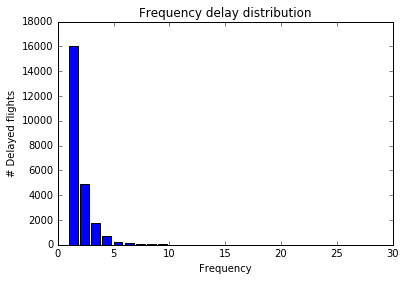

In [40]:
import matplotlib.pyplot as plt
#matplotlib.use('qt4agg')
%matplotlib inline

# We eliminate the on-time flights
delayed = dict((k,v) for k,v in fightsParsedDict.items() if k > 0)

x = delayed.keys()
plt.bar(x, delayed.values(), color = "b", width = 0.8)
plt.xlabel('Frequency')
plt.ylabel('# Delayed flights')
plt.title('Frequency delay distribution')
plt.show()

## Part 3

### Average delay per airport

In part 3 we are goint to use another type of RDDs: Pair RDD
In a Basic RDD, each record is an object and the map and reduce operation apply in the entire record
In a Pair Rdd, each record is a tuple, and the operations apply the key or the values but not in both

### Option 1: using reduceByKey

In [41]:
# We create a Pair RDD using a map function over flightParsed and extracting the tuple (origin, dep_delay)
airportDelays = flightsParsed.map(lambda x: (x.origin,x.dep_delay))

In [42]:
# Lets confirm we have created a tuple
# keys() and values() are transformations, so they materialize the Pair RDD
airportDelays.keys().take(10)

['JFK', 'LAX', 'JFK', 'LAX', 'DFW', 'OGG', 'DFW', 'HNL', 'JFK', 'LAX']

In [43]:
airportDelays.values().take(10)

[-6.0, 14.0, -6.0, 25.0, -5.0, 126.0, 125.0, 4.0, -7.0, 21.0]

In [44]:
# We use reduceByKey twice. The operation is as follow: group and sum at node level, shuffle the results 
# and reallocate the partial results in the avaliable nodes, and finally, sum again the partial result 
# to obtain the final results.

# First find the total delay per airport. The keys() are the airports and the values() are the delay

# reduceByKey is a transformation that takes a function that combines two elements into one

# airportTotalDelay is a PairRDD with two element: airports and sum of delays
# reduceByKey flattens the original PairRDD
airportTotalDelay = airportDelays.reduceByKey(lambda x,y:x+y)

# Find the count per airport
# With mapValues we are mapping all the delay values into 1 (in order to sum it and make the counting)
# reduceByKey only adds all these ones
airportCount = airportDelays.mapValues(lambda x:1).reduceByKey(lambda x,y:x+y)

# So we have two PairRDD; we need to join it to have the sum, count in one RDD 
# This will merge both PairRDD by matching values with the same key
# airportSumCount has the following structure:   ('JFK', (23, 4)), ('LAX', (14, 2))
airportSumCount = airportTotalDelay.join(airportCount)

# Compute avg delay per airport 
airportAvgDelay = airportSumCount.mapValues(lambda x : x[0]/float(x[1]))

# All these three steps could by combined in only one using combineByKey

In [45]:
# Displaying the 10 firs element sorted in descending order
airportAvgDelay.sortBy(lambda x:-x[1]).take(10)

[('PPG', 56.25),
 ('EGE', 32.0),
 ('OTH', 24.533333333333335),
 ('LAR', 18.892857142857142),
 ('RDD', 18.55294117647059),
 ('MTJ', 18.363636363636363),
 ('PUB', 17.54),
 ('EWR', 16.478549005929544),
 ('CIC', 15.931034482758621),
 ('RST', 15.6993006993007)]

### Option 2: using combineByKey

In [46]:
# combineByKey requieres three functions
# 1st function "createCombiner" returns a tuple. This initializes a value when a key is first seen within a partition
# 2nd function "merge". It merges all the values with the same key in a single partition
# 3rd function "mergeCombiner". It specifies how the result from each partition should be combined among partitions
# In between 2dn adn 3rd funtions it is executed the shuffle process

airportSumCount2 = airportDelays.combineByKey((lambda value:(value,1)),
                                            (lambda acc, value: (acc[0]+value,acc[1]+1)),
                                            (lambda acc1, acc2: (acc1[0]+acc2[0],acc1[1]+acc2[1])))

In [47]:
# The result is a key value pair with key (airpot) and a tuple value with sum and count
airportSumCount2.take(10)

[('JFK', (56469.0, 8070)),
 ('MIA', (26797.0, 7014)),
 ('LIH', (-857.0, 892)),
 ('LIT', (11744.0, 1178)),
 ('CLT', (75719.0, 9387)),
 ('BGR', (109.0, 87)),
 ('YUM', (922.0, 253)),
 ('DRO', (1455.0, 166)),
 ('PAH', (864.0, 59)),
 ('FSD', (4319.0, 530))]

In [48]:
airportAvgDelay2=airportSumCount2.mapValues(lambda x : x[0]/float(x[1]))

In [49]:
# We sort the Pair RDD using the sortBy operation, which is a transformations (not materialized) and it can be 
# used either Basic or Paired RDDs
# With x[1] we are accessing o the second part of the tuple, that means the value.
# With the action take(10) we materialize the RDD
airportAvgDelay2.sortBy(lambda x:-x[1]).take(10)

[('PPG', 56.25),
 ('EGE', 32.0),
 ('OTH', 24.533333333333335),
 ('LAR', 18.892857142857142),
 ('RDD', 18.55294117647059),
 ('MTJ', 18.363636363636363),
 ('PUB', 17.54),
 ('EWR', 16.478549005929544),
 ('CIC', 15.931034482758621),
 ('RST', 15.6993006993007)]

In [56]:
# But we can't understand the acronyms. We get the airport descriptions from airport.csv
# We use the notHeader and split functions feclares before in order to parse and clean the csv file
# The result (airports) is a Pair RDD (Airport Code, Airport Description)
airports = sc.textFile(airportsPath).filter(notHeader).map(split)

In [60]:
type(airports)

pyspark.rdd.PipelinedRDD

We have three options to use this RDD: lookup action, map and broadcast


### Using lookup

In [61]:
# lookup uses the key in order to find a spacific record in the RDD
airports.lookup('PPG')

['Pago Pago, TT: Pago Pago International']

In [62]:
airports.lookup('JFK')

['New York, NY: John F. Kennedy International']

### Using a dictionary (map)
A dictionay in Python is also a map

In [63]:
# We can build a map with all airports and use it
# collectAsMap is an action and returns a dictionary with all the key value pairs in the RDD
airportLookup = airports.collectAsMap()

In [53]:
airportLookup

{'SPY': "San Pedro, Cote d'Ivoire: San Pedro Airport",
 'SPZ': 'Springdale, AR: Springdale Municipal',
 'SPP': 'Menongue, Angola: Menongue Airport',
 'SPQ': 'San Pedro, CA: Catalina Air-Sea Terminal Heliport',
 'SPR': 'San Pedro, Belize: San Pedro Airport',
 'SPS': 'Wichita Falls, TX: Sheppard AFB/Wichita Falls Municipal',
 'SPU': 'Split, Croatia: Split Airport',
 'SPW': 'Spencer, IA: Spencer Municipal',
 'SPH': 'Sopu, Papua New Guinea: Sopu Airport',
 'SPI': 'Springfield, IL: Abraham Lincoln Capital',
 'SPK': 'Sapporo, Japan: Chitose AB',
 'SPM': 'Spangdahlem, Germany: Spangdahlem AB',
 'SPN': 'Saipan, TT: Francisco C. Ada Saipan International',
 'SPA': 'Spartanburg, SC: Spartanburg Downtown Memorial',
 'SPB': 'Charlotte Amalie, VI: Charlotte Amalie Harbor Seaplane Base',
 'SPC': 'Santa Cruz de la Palma, Spain: La Palma',
 'SPD': 'Saidpur, Bangladesh: Saidpur Airport',
 'SPE': 'Sepulot, Malaysia: Sepulot Airport',
 'SPF': 'Spearfish, SD: Black Hills Clyde Ice Field',
 'SPG': 'Tampa, F

In [64]:
type(airportLookup)

dict

In [54]:
# Now we replace the airport code by the airport description
# Lookup the airport name for all the airport codes
# in the lambda function, x represents each record which is a tuple (airpor_code, average_delay)
# Spark distributes this lambda funtion through all the nodes. This functions uses the airportLookup variable
# it wil carry it's own copy of this variable to each node
# This kind of functions that has a reference within themselves are called "enclosure functions"
# This functions has a tremendous abstaraction power but they have a big network consume if we needed frequently
# ... the solution is "broadcast" it

airportAvgDelay.map(lambda x: (airportLookup[x[0]],x[1])).take(10)

[('New York, NY: John F. Kennedy International', 6.997397769516729),
 ('Miami, FL: Miami International', 3.820501853435985),
 ('Lihue, HI: Lihue Airport', -0.9607623318385651),
 ('Little Rock, AR: Bill and Hillary Clinton Nat Adams Field',
  9.96943972835314),
 ('Charlotte, NC: Charlotte Douglas International', 8.066368381804624),
 ('Bangor, ME: Bangor International', 1.2528735632183907),
 ('Yuma, AZ: Yuma MCAS/Yuma International', 3.644268774703557),
 ('Durango, CO: Durango La Plata County', 8.765060240963855),
 ('Paducah, KY: Barkley Regional', 14.64406779661017),
 ('Sioux Falls, SD: Joe Foss Field', 8.149056603773586)]

### Using broadcast
This is much more eficient because the broadcast variable is cached in the memory of every node and they carry data within themselves

In [55]:
# Broadcast Variable
# With this instruction you are caching the variable through all nodes
# They have three characteristics: immutable, distributes, and in memory

airportBC = sc.broadcast(airportLookup)

In [59]:
airportAvgDelay.map(lambda x: (airportBC.value[x[0]],x[1])).sortBy(lambda x:-x[1]).take(10)

[('Pago Pago, TT: Pago Pago International', 56.25),
 ('Eagle, CO: Eagle County Regional', 32.0),
 ('North Bend/Coos Bay, OR: Southwest Oregon Regional', 24.533333333333335),
 ('Laramie, WY: Laramie Regional', 18.892857142857142),
 ('Redding, CA: Redding Municipal', 18.55294117647059),
 ('Montrose/Delta, CO: Montrose Regional', 18.363636363636363),
 ('Pueblo, CO: Pueblo Memorial', 17.54),
 ('Newark, NJ: Newark Liberty International', 16.478549005929544),
 ('Chico, CA: Chico Municipal', 15.931034482758621),
 ('Rochester, MN: Rochester International', 15.6993006993007)]